In [1]:
%matplotlib inline
import matplotlib.pylab as plt

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from datetime import datetime
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
from math import sqrt
from scipy.spatial.distance import squareform

In [2]:
words = pd.read_csv('data/50words_TEST.csv', index_col = 0, header = None)

### Let's take a look at some of the words 'on average'

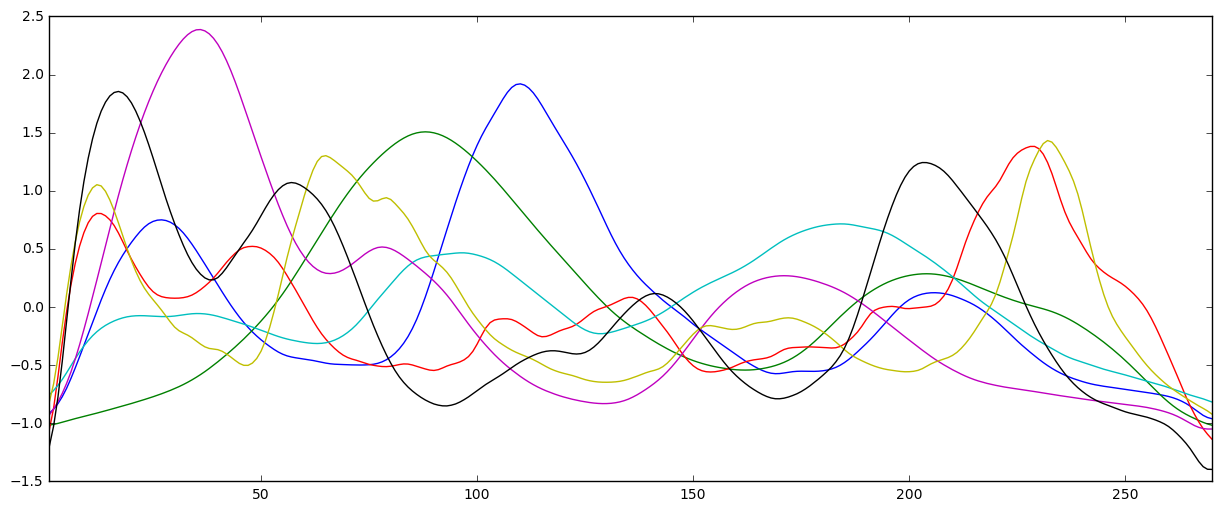

In [3]:
for i in range(7):
    row = words.groupby(words.index).mean().iloc[i]
    row.plot()

### We can also check to see whether the 'average' matches the individual plot for a given type

First, the 'average'

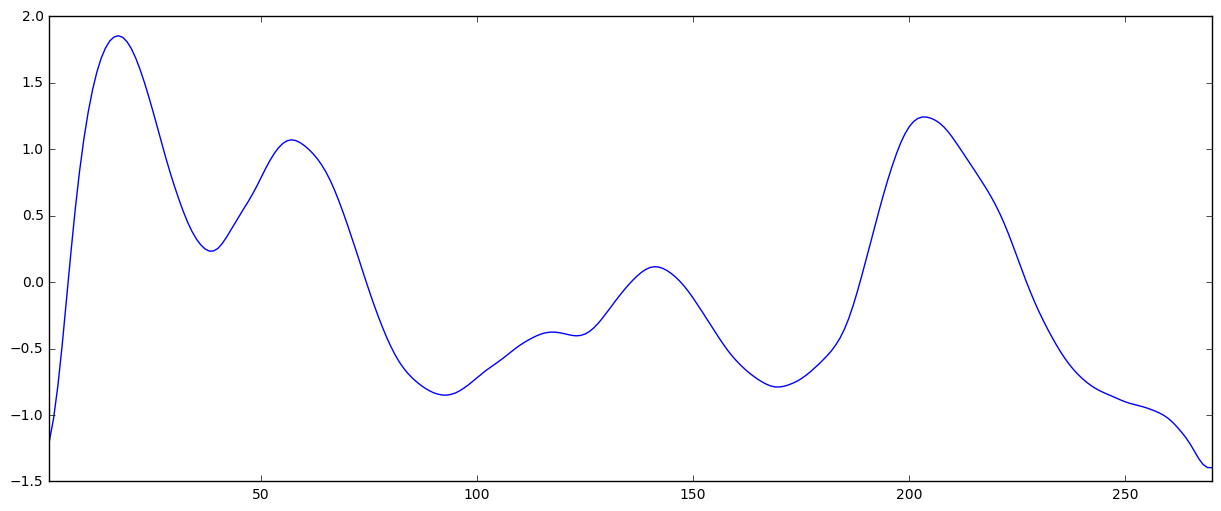

In [4]:
word_type = 7
row = words.groupby(words.index).mean().iloc[word_type-1]
row.plot()

Next the full sample of all those words

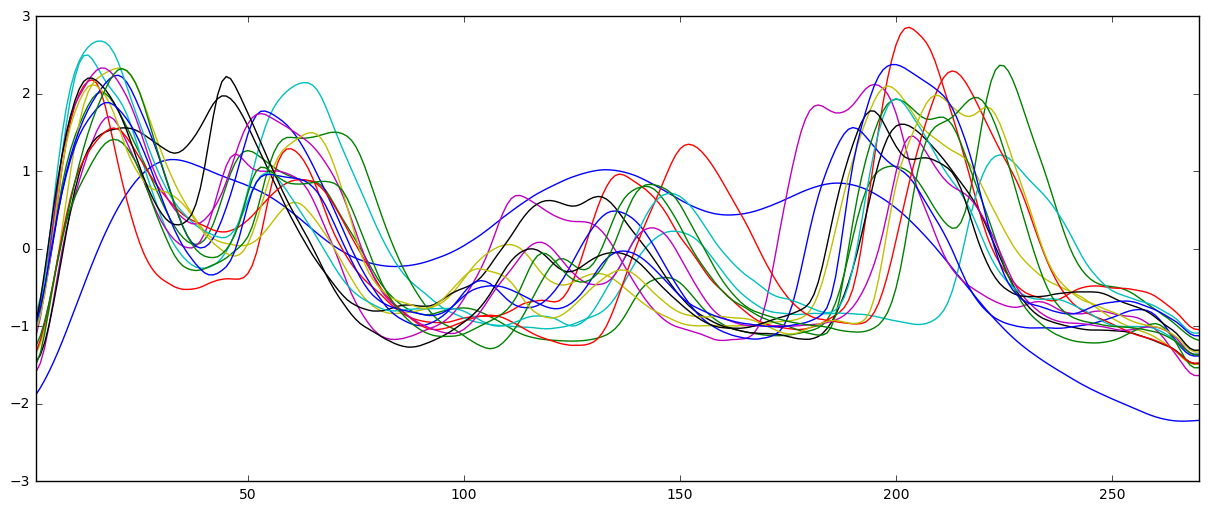

In [5]:
for i in range(words[words.index == word_type].shape[0]):
    row = words[words.index == word_type].iloc[i]
    row.plot()

### Let's try to code up the sensible distance function to describe the distance between two times series

In [6]:
# %load snippets/dtwdistance.py
#courtesy https://en.wikipedia.org/wiki/Dynamic_time_warping

def DTWDistance(s1, s2):
    DTW={}

    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return sqrt(DTW[len(s1)-1, len(s2)-1])

In [7]:
chosen_words = words[words.index == word_type]
s1 = chosen_words.iloc[2]
s2 = chosen_words.iloc[3]
print(type(s1))
DTWDistance(s1.values, s2.values)

<class 'pandas.core.series.Series'>


6.58261365073929

In [8]:
s3 = words.iloc[0]
DTWDistance(s1.values, s3.values)

11.099002878491204

In [9]:
s3 = words.iloc[0]
DTWDistance(s2.values, s3.values)

10.501580760094857

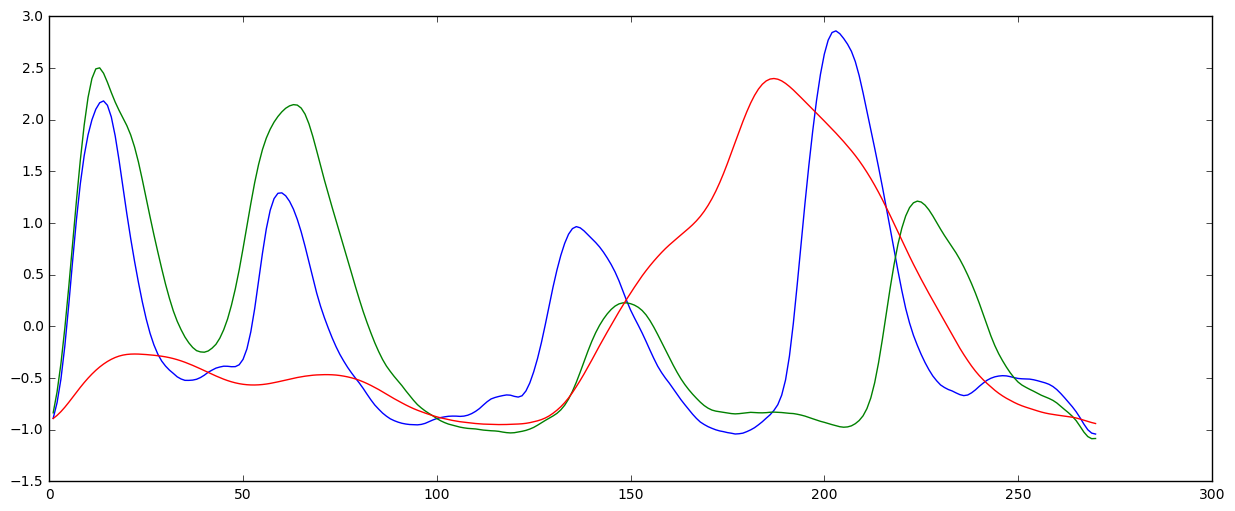

In [10]:
plt.plot(s1)
plt.plot(s2)
plt.plot(s3)

### Compare the performance of Euclidean distance with that of DTDW for s1, s2, s3 as specified above

In [12]:
# %load snippets/euclidedistance.py
def EuclidDistance(s1, s2):
    sum_squares = 0
    for i in range(len(s1)):
        sum_squares = sum_squares + (s1[i] - s2[i])**2
    return sqrt(sum_squares)

### Can you classify a random row by determining which 'mean' curve it is closest to? How successful is this?

In [14]:
# %load snippets/nearestmean.py

from random import randint

def test_idea(words_df):
    distances = []
    mean_words = words_df.groupby(words_df.index).mean()
    i = randint(0, words_df.shape[0])
    random_word = words_df.iloc[i]
    for mean_idx in range(mean_words.shape[0]):
        current_mean_word = mean_words.iloc[mean_idx]
        distances.append(DTWDistance(current_mean_word.values, random_word.values))
    return (random_word.name, distances)

word_type, distances = test_idea(words)
indexed_distances = enumerate(distances)
word_type
list(indexed_distances)

[(0, 8.983576558887604),
 (1, 12.232377104703628),
 (2, 10.120601620638205),
 (3, 12.684999315545953),
 (4, 12.028432069284493),
 (5, 6.677870989467626),
 (6, 8.897972072223892),
 (7, 9.5384243626288),
 (8, 12.468640224447064),
 (9, 9.2464377985145),
 (10, 10.647594922064478),
 (11, 13.562581263390198),
 (12, 12.284599523355972),
 (13, 11.973614002296637),
 (14, 9.557813405809917),
 (15, 6.218282900697855),
 (16, 12.025665834249788),
 (17, 10.561177295386635),
 (18, 9.253536213347129),
 (19, 14.052574455272058),
 (20, 13.505550404771775),
 (21, 11.41116835325147),
 (22, 8.614108992922155),
 (23, 8.128339005656604),
 (24, 10.59814592601415),
 (25, 4.929660814187698),
 (26, 6.59552371697776),
 (27, 7.5209402802086265),
 (28, 9.744247967384794),
 (29, 9.958088698924438),
 (30, 8.294671945148291),
 (31, 7.3622734091215545),
 (32, 12.163527639959117),
 (33, 7.264334597052778),
 (34, 9.653919557855891),
 (35, 10.387780812517672),
 (36, 6.696854098475118),
 (37, 9.814389249136232),
 (38, 6.47